

```
# This is formatted as code
```

# Heart Attack Modeling

**Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import reciprocal, uniform, randint
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, roc_curve, auc,f1_score

 Read the Dataset

In [4]:
df = pd.read_csv('/content/Cleaned_Encoded_Heart_Attack.csv')

# Explore the Data

**1- Basic Exploration**


*   print the first and last few rows for understanding the structure of the dataset.




In [5]:
df.head(3)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,66.0,160.0,83.0,160.00,1.80,0.01200,0
1,21,94.0,98.0,46.0,276.75,6.75,0.20475,1
2,55,64.0,160.0,77.0,270.00,1.99,0.00300,0


In [6]:
df.tail(3)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1316,45,85.0,168.0,104.0,96.00,1.24,0.20475,1
1317,54,58.0,117.0,68.0,276.75,5.80,0.20475,1
1318,51,94.0,157.0,79.0,134.00,12.03,0.20475,1


In [7]:
print(f"Total Records : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Total Records : 1319
Number of columns : 8


**This is a cleaned encoded dataset**

**Split the dataframe in to features and labels**

In [ ]:
X = df.drop('Result',axis=1)
y = df['Result']

In [ ]:
#split the data in to train ,test use stratiify

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)


In [ ]:
#  save scaler

import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Machine Learning Classifiers

# Function for Evaluating the models

In [ ]:
# Function for Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
def random_search(classifier,params) :
   # Perform grid search with cross-validation
   cv= RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,         # use all available cores
    error_score='raise')

   cv.fit(X_train_normalized, y_train)
   print(f'Classifier: {classifier}')
   print(f'Best Parameters: {cv.best_params_}')
   best_model = cv.best_estimator_
   return best_model

In [ ]:
# function for evaluate with different metrics
def evaluate_classifier_with_metrics(classifier):
   y_pred_train = classifier.predict(X_train_normalized)
   # Calculate accuracy on the training set
   accuracy_train = accuracy_score(y_train, y_pred_train)
   print(f"Training Accuracy: {accuracy_train*100:.2f}%")
  # calculate precision
   precision_train = precision_score(y_train, y_pred_train, average='weighted')
   print(f"Training Precision: {precision_train*100:.2f}%")
   # Calculate recall
   recall_train = recall_score(y_train, y_pred_train, average='weighted')
   print(f"Training Recall: {recall_train*100:.2f}%")
   # calculate f1score
   f1_train =f1_score(y_train, y_pred_train, average='weighted')
   print(f"Training F1 Score: {f1_train*100:.2f}%")


   y_pred_test = classifier.predict(X_test_normalized)
   # Calculate accuracy on the testing set
   accuracy_test = accuracy_score(y_test, y_pred_test)
   print(f"Testing  Accuracy: {accuracy_test*100:.2f}%")
   # Calculate precision
   precision_test = precision_score(y_test, y_pred_test, average='weighted')
   print(f"testing Precision: {precision_test*100:.2f}%")
   # Calculate recall
   recall_test = recall_score(y_test, y_pred_test, average='weighted')
   print(f"testing Recall:{recall_test*100 :.2f} %")
   #calculate f1score
   f1_test =f1_score(y_test, y_pred_test, average='weighted')
   print(f"testing F1 Score: {f1_test*100:.2f}%")

# Random Forest

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_normalized, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
evaluate_classifier_with_metrics(rf)

Training Accuracy: 100.00%
Training Precision: 100.00%
Training Recall: 100.00%
Training F1 Score: 100.00%
Testing  Accuracy: 98.11%
testing Precision: 98.11%
testing Recall:98.11 %
testing F1 Score: 98.11%


In [ ]:
# parameter for adeep randomized serch for random forest

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


# Call random search function
best_rf_model = random_search(rf, param_grid_rf)

# Evaluate the best model
evaluate_classifier_with_metrics(best_rf_model)



Classifier: RandomForestClassifier(class_weight='balanced', random_state=42)
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 406}
Training Accuracy: 98.96%
Training Precision: 98.98%
Training Recall: 98.96%
Training F1 Score: 98.96%
Testing  Accuracy: 98.11%
testing Precision: 98.11%
testing Recall:98.11 %
testing F1 Score: 98.11%


<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">XGBoost</h3>

In [ ]:
#  build XGboost model
import xgboost as xgb
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42,class_weight ='balanced')

# Train the classifier
xgb_classifier.fit(X_train_normalized, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[21:28:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
evaluate_classifier_with_metrics(xgb_classifier)

Training Accuracy: 100.00%
Training Precision: 100.00%
Training Recall: 100.00%
Training F1 Score: 100.00%
Testing  Accuracy: 98.48%
testing Precision: 98.48%
testing Recall:98.48 %
testing F1 Score: 98.48%


In [ ]:
# Define a robust parameter grid for XGBoost
param_grid = {
    "n_estimators": [100, 200, 300],                # Number of boosting rounds
    "max_depth": [3, 5, 7, 9],                        # Maximum tree depth; controls model complexity
    "learning_rate": [0.01, 0.05, 0.1, 0.2],          # Step size shrinkage to prevent overfitting
    "subsample": [0.6, 0.8, 1.0],                     # Fraction of samples used per tree
    "colsample_bytree": [0.6, 0.8, 1.0],              # Fraction of features used per tree
    "gamma": [0, 0.1, 0.2, 0.3],                      # Minimum loss reduction to make a split
    "min_child_weight": [1, 3, 5],                    # Minimum sum of instance weight needed in a child
    "reg_alpha": [0, 0.01, 0.1, 1],                   # L1 regularization term on weights
    "reg_lambda": [1, 1.5, 2, 3]                      # L2 regularization term on weights
}
xgb_best_model =random_search(xgb_classifier,param_grid)

Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[21:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.




In [ ]:
evaluate_classifier_with_metrics(xgb_best_model)

Training Accuracy: 98.86%
Training Precision: 98.88%
Training Recall: 98.86%
Training F1 Score: 98.86%
Testing  Accuracy: 98.11%
testing Precision: 98.11%
testing Recall:98.11 %
testing F1 Score: 98.11%


# Decision Tree (DT) Model

* Decision trees being one of the most popular and effective techniques used to
   solve classification problems.
* It is important to prioritize the features when creating a tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the normalized training data
clf_dt.fit(X_train_normalized, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
evaluate_classifier_with_metrics(clf_dt)

Training Accuracy: 100.00%
Training Precision: 100.00%
Training Recall: 100.00%
Training F1 Score: 100.00%
Testing  Accuracy: 97.35%
testing Precision: 97.36%
testing Recall:97.35 %
testing F1 Score: 97.34%


In [ ]:
# parameter for randomized search in descition tree

# Define the parameter distribution for RandomizedSearchCV
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(2, 10),  # Random integer between 2 and 10
    'min_samples_split': randint(2, 10), # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 5), # Random integer between 1 and 5
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

dt_best_model = random_search(clf_dt, param_distributions_dt)
evaluate_classifier_with_metrics(dt_best_model)


Classifier: DecisionTreeClassifier(random_state=42)
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}
Training Accuracy: 98.86%
Training Precision: 98.89%
Training Recall: 98.86%
Training F1 Score: 98.87%
Testing  Accuracy: 98.11%
testing Precision: 98.11%
testing Recall:98.11 %
testing F1 Score: 98.11%


# Ensemble Model (Voting)

A voting classifier is a machine learning model that combines the predictions of several other individual models, also known as an ensemble method. Instead of relying on a single model, it leverages the strengths of various models to arrive at a more robust prediction.
I choose the best 3 models (Random Forest ,XGBOOST ,DECISION TREE)

In [ ]:
  #

In [ ]:
#  make ensemble learning for rf,xgb,decision tree
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_classifier),
        ('dt', dt_best_model)
    ],
    voting='soft'  # Use 'hard' for majority voting
)

ensemble_model.fit(X_train_normalized, y_train)

y_pred_ensemble = ensemble_model.predict(X_test_normalized)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}%")


Ensemble Model Accuracy: 98.11%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[21:28:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.




**From the above , I choosed XGBoost to be the best model,as it give me the highest accuracy**

# plot Confusion Matrix

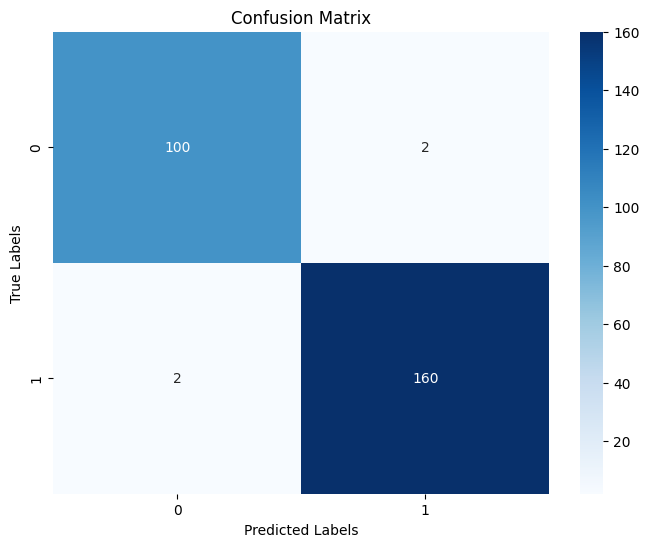

--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_test= xgb_classifier.predict(X_test_normalized)
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("--------------------------------------------------------------------------")
print(classification_report(y_test, y_pred_test))

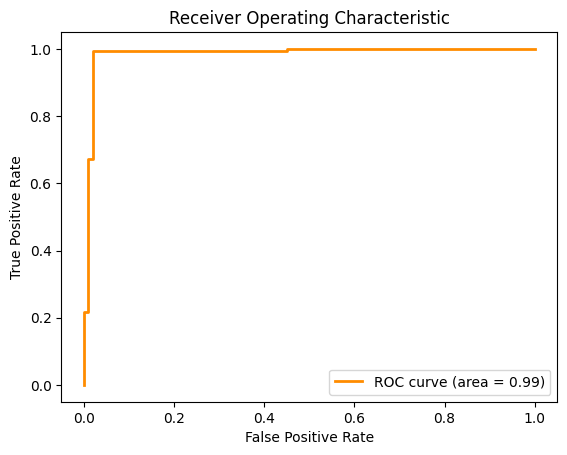

In [ ]:
#plot Auc curve

from sklearn.metrics import roc_curve, auc
y_pred_proba = xgb_classifier.predict_proba(X_test_normalized)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



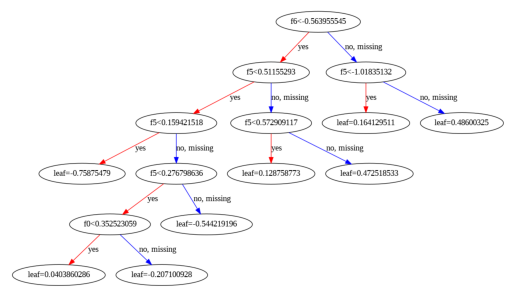

In [ ]:
#  plot xgboost hierarical
xgb.plot_tree(xgb_classifier, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
#  save rf_best model
joblib.dump(xgb_classifier, 'heartattack_xgb_best_model.pkl')


['heartattack_xgb_best_model.pkl']

In [ ]:
# Example user input
new_data = np.array([45,85,168,104,96,1.24,4.25])
new_data_df = pd.DataFrame([new_data], columns=X_train.columns)  # Convert to DataFrame

# Scale the input (if you used StandardScaler during training)
new_data_scaled = scaler.transform(new_data_df)

# Make prediction
prediction = xgb_classifier.predict(new_data_scaled)
label ={0:"negative" ,1:"positive"}
print(f"Prediction is : {label[prediction[0]]}")




Prediction is : positive


#SHAP (SHapley Additive exPlanations)

SHAP values help explain the predictions of machine learning models by showing how much each feature contributes to the final output.


In [ ]:
!pip install shap

In [ ]:
import shap
#create shap explainer
# Disable the additivity check by setting check_additivity=False
explainer = shap.TreeExplainer(xgb_classifier)
#calculate shap values

shap_values = explainer.shap_values(X_test_normalized)

In [ ]:
X_train.columns

Index(['Age', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
      dtype='object')

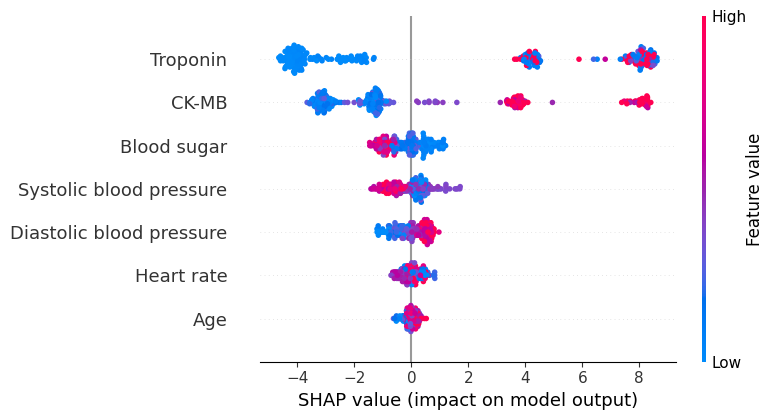

In [ ]:
feature_names =['Age', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
shap.summary_plot(shap_values, X_test_normalized,feature_names= feature_names)

### *SHAP Waterfall Plot Function Explanation*  

This function generates a *waterfall plot* using SHAP values to explain the impact of each feature on a specific prediction.  

#### *How It Works:*  
1. *Extract Feature Names:*  
   - feature_names = X_test.columns retrieves the actual feature names from the dataset instead of using generic labels (Feature 0, Feature 1, etc.).  

2. *Create a SHAP Explanation Object:*  
   - shap.Explanation() combines the SHAP values, the model's expected output, and the feature names into a structured format.  

3. *Plot the Waterfall Chart:*  
   - shap.plots.waterfall() visualizes how each feature increases or decreases the model’s prediction.  

#### *Interpretation:*  
- *Red bars* indicate features that increase the predicted value.  
- *Blue bars* indicate features that decrease the predicted value.  
- The *base value* represents the model's average output before considering specific feature effects.  
The final value on the right is the model’s prediction for this sample.  


This visualization helps in understanding which factors contributed the most to the model's decision.

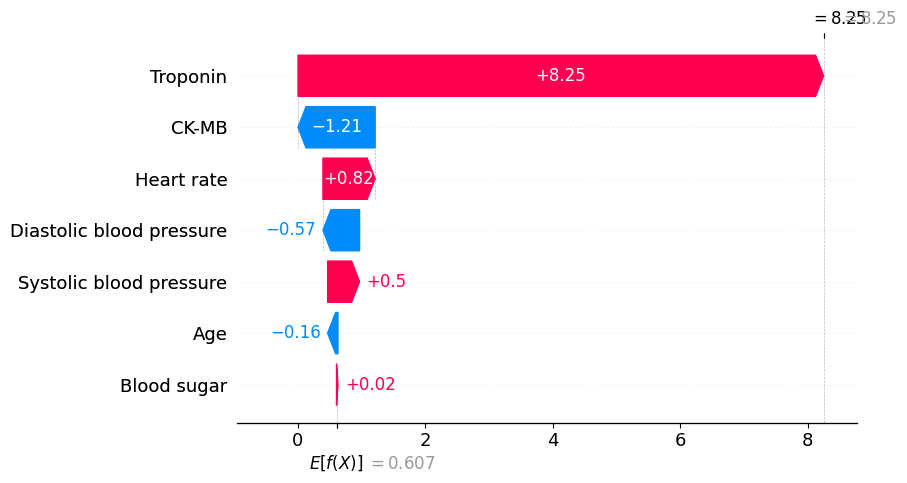

In [ ]:
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      feature_names=feature_names))


    Generates a detailed medical report with:
    - Standard explanations for all features.
    - A separate assessment and diagnosis section with unique text.
    - Risk-based recommendations.

    Parameters:
    - patient_data (dict): Patient's health metrics.
    - shap_values (dict): SHAP values for feature importance.
    - prediction_prob (float): Predicted risk probability.

    Returns:
    - Displays a Markdown-formatted report.
   

In [ ]:
from IPython.display import display, Markdown

def generate_medical_report(patient_data, shap_values, prediction_prob):


    # Medical explanations for all features
    medical_explanations = {
        "Age": lambda v: " Middle-aged, moderate risk." if 40 <= v <= 55 else
                         " Advanced age, increased cardiovascular risk." if v > 55 else
                         " Young age, lower cardiovascular risk.",

        "Heart rate": lambda v: " Normal heart rate." if 60 <= v <= 100 else
                                " Tachycardia, potential heart stress." if v > 100 else
                                " Bradycardia, possible conduction abnormality.",

        "Systolic blood pressure": lambda v: "🟢 Optimal systolic pressure." if v < 120 else
                                            "🟡 Elevated systolic pressure, requires monitoring." if 120 <= v <= 139 else
                                            " Hypertension, medical intervention needed.",

        "Diastolic blood pressure": lambda v: " Normal diastolic pressure." if 60 <= v <= 80 else
                                             " Mildly elevated, monitor closely." if 81 <= v <= 89 else
                                             " High diastolic pressure, increased cardiac risk.",

        "Blood sugar": lambda v: " Normal blood glucose." if 70 <= v <= 99 else
                                " Prediabetes, lifestyle changes advised." if 100 <= v <= 125 else
                                " Hyperglycemia, diabetes risk factor.",

        "CK-MB": lambda v: " Normal, no cardiac injury detected." if v < 5 else
                           " Elevated CK-MB, possible myocardial damage.",

        "Troponin": lambda v: " Normal, no myocardial injury." if v < 0.04 else
                              " High troponin, potential heart attack risk."
    }

# Sort features by SHAP impact
    sorted_features = sorted(shap_values.items(), key=lambda x: abs(x[1]), reverse=True)
    top_3_features = [f[0] for f in sorted_features[:3]]

    # Generate Report Header
    report_text = "## 📝 Comprehensive Medical Report\n\n"

    # 🔍 *Feature-Based Observations*
    report_text += "### 🔍 Patient Observations\n\n"
    report_text += "| Feature | Value | Interpretation |\n"
    report_text += "|---------|-------|----------------|\n"

    for feature, value in patient_data.items():
        explanation = medical_explanations.get(feature, lambda v: "No standard interpretation available.")(value)
        if feature in top_3_features:
            explanation += f" *(Major Impact: {shap_values[feature]:.2f})*"
        report_text += f"| {feature} | {value} | {explanation} |\n"

    # ✍️ *Assessment & Diagnosis (Unique Text)*
    report_text += "\n### 📑 Clinical Assessment & Diagnosis\n\n"

    assessment_text = "The patient presents with the following key findings:\n\n"
    for feature in top_3_features:
        value = patient_data[feature]
        if feature == "Age":
            if value > 55:
                assessment_text += "- Advanced age is a contributing factor to cardiovascular risks.\n"
            else:
                assessment_text += "- Age does not pose a significant risk factor.\n"

        elif feature == "Heart rate":
            if value > 100:
                assessment_text += "- Elevated heart rate suggests potential arrhythmia or stress response.\n"
            elif value < 60:
                assessment_text += "- Low heart rate may indicate bradycardia requiring further evaluation.\n"
            else:
                assessment_text += "- Heart rate is within normal range.\n"

        elif feature == "Systolic blood pressure":
            if value >= 140:
                assessment_text += "- Hypertension detected, increasing the risk of stroke and heart failure.\n"
            else:
                assessment_text += "- Blood pressure is within normal limits.\n"

        elif feature == "Diastolic blood pressure":
            if value > 90:
                assessment_text += "- High diastolic pressure suggests increased vascular resistance.\n"

        elif feature == "Blood sugar":
            if value > 125:
                assessment_text += "- Elevated blood glucose is a major cardiovascular risk factor.\n"

        elif feature == "CK-MB":
            if value > 5:
                assessment_text += "- CK-MB levels suggest myocardial injury, further cardiac evaluation needed.\n"

        elif feature == "Troponin":
            if value > 0.04:
                assessment_text += "- High troponin indicates potential myocardial infarction, urgent care advised.\n"

    report_text += assessment_text + "\n"

    # 🔻 *Risk-Based Recommendations*
    report_text += "### 🏥 Medical Recommendations\n\n"

    if prediction_prob >= 70:
        report_text += "**🔴 Urgent Action Required:**\n"
        report_text += "- 🚑 Immediate ECG, cardiac biomarkers, and hospital evaluation.\n"
        report_text += "- ⚕ Consider cardiac imaging and stress testing.\n"

    elif 40 <= prediction_prob < 70:
        report_text += "**🟠 Medical Guidance:**\n"
        report_text += "- 🏃 Improve physical activity and diet.\n"
        report_text += "- 🩺 Regular monitoring of blood pressure and glucose.\n"
        report_text += "- 🚫 Lifestyle changes: reduce smoking, alcohol, and stress.\n"

    else:
        report_text += "**✅ Preventive Measures:**\n"
        report_text += "- 🥗 Maintain a healthy, balanced diet.\n"
        report_text += "- 🚶 Regular physical activity.\n"
        report_text += "- 🏥 Routine health check-ups.\n"
    return report_text
    # Display final report
    #display(Markdown(report_text))


In [ ]:
patient_data = np.array([[45, 72, 140, 90, 110, 5.2, 0.1]])

patient_data_normalized = scaler.transform(patient_data)
prediction_proba = xgb_classifier.predict_proba(patient_data_normalized)[:, 1][0]

#  SHAP values
shap_values = explainer.shap_values(patient_data_normalized)

# Get feature names from the training data
feature_names = X_train.columns

# Convert patient_data and shap_values to dictionaries
patient_data_dict = dict(zip(feature_names, patient_data[0])) # Convert patient data to a dictionary
shap_values_dict = dict(zip(feature_names, shap_values[0])) # Convert SHAP values to a dictionary

# Call the generate_medical_report function with the dictionary inputs
report = generate_medical_report(patient_data_dict, shap_values_dict, prediction_proba)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# display report in markdown

from IPython.display import Markdown
Markdown(report)


## 📝 Comprehensive Medical Report

### 🔍 Patient Observations

| Feature | Value | Interpretation |
|---------|-------|----------------|
| Age | 45.0 |  Middle-aged, moderate risk. |
| Heart rate | 72.0 |  Normal heart rate. |
| Systolic blood pressure | 140.0 |  Hypertension, medical intervention needed. *(Major Impact: -0.76)* |
| Diastolic blood pressure | 90.0 |  High diastolic pressure, increased cardiac risk. |
| Blood sugar | 110.0 |  Prediabetes, lifestyle changes advised. |
| CK-MB | 5.2 |  Elevated CK-MB, possible myocardial damage. *(Major Impact: 0.80)* |
| Troponin | 0.1 |  High troponin, potential heart attack risk. *(Major Impact: 6.81)* |

### 📑 Clinical Assessment & Diagnosis

The patient presents with the following key findings:

- High troponin indicates potential myocardial infarction, urgent care advised.
- CK-MB levels suggest myocardial injury, further cardiac evaluation needed.
- Hypertension detected, increasing the risk of stroke and heart failure.

### 🏥 Medical Recommendations

**✅ Preventive Measures:**
- 🥗 Maintain a healthy, balanced diet.
- 🚶 Regular physical activity.
- 🏥 Routine health check-ups.



  # Generates and displays a Gauge Chart for heart attack risk percentage
    
    Parameters:
    - risk_percentage (float): The predicted risk percentage (0-100).
    
    Returns:
    - Displays an interactive gauge chart.
    

In [ ]:
import plotly.graph_objects as go

def plot_gauge_chart(risk_percentage):

    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=risk_percentage,
        title={'text': "Heart Attack Risk"},
        number={'suffix': "%"},
        gauge={'axis': {'range': [0, 100]},
               'bar': {'color': "black"},
               'steps': [
                   {'range': [0, 40], 'color': "green"},
                   {'range': [40, 70], 'color': "orange"},
                   {'range': [70, 100], 'color': "red"}]
              }
    ))
    fig.show()

In [ ]:
plot_gauge_chart(prediction_proba*100)

In [ ]:
import plotly.graph_objects as go

def plot_patient_waterfall(feature_names, shap_values, total_risk):
    """
    Generates a Waterfall Chart to explain heart attack risk for a single patient.

    Parameters:
    - feature_names (list): List of medical factors.
    - shap_values (list): Corresponding SHAP values for each factor.
    - total_risk (float): Predicted heart attack risk (in percentage).

    Returns:
    - Displays an easy-to-understand waterfall chart.
    """

    # Sort factors by absolute impact (most influential first)
    sorted_indices = sorted(range(len(shap_values)), key=lambda i: abs(shap_values[i]), reverse=True)
    feature_names = [feature_names[i] for i in sorted_indices]
    shap_values = [shap_values[i] for i in sorted_indices]

    # Define colors (🔴 red = increases risk, 🟢 green = decreases risk)
    colors = ["red" if val > 0 else "green" for val in shap_values]

    # Create the Waterfall Chart
    fig = go.Figure(go.Waterfall(
        name="Risk Contribution",
        orientation="v",
        measure=["relative"] * len(feature_names),
        x=feature_names,
        y=shap_values,
        text=[f"{val:.2f}%" for val in shap_values],  # Show percentage impact
        textposition="outside",
        connector={"line": {"color": "gray"}},
        decreasing={"marker": {"color": "green"}},  # Green for risk-reducing factors
        increasing={"marker": {"color": "red"}},  # Red for risk-increasing factors
    ))

    # Add total risk as a separate annotation
    fig.add_annotation(
    text=f"🔹 *Total Risk: {total_risk:.1f}%*",
    x=0.5, y=1.1,  # Adjust Y to place it right under the title
    showarrow=False,
    font=dict(size=16, color="black"),
    xref="paper", yref="paper",  # Relative positioning
    align="center"
)

    # Update layout for better readability
    fig.update_layout(
        title="📊 Heart Attack Risk Breakdown (Single Patient)",
        yaxis_title="Impact on Risk (%)",
        xaxis_title="Medical Factors",
        showlegend=False
    )

    fig.show()

# Example usage:

plot_patient_waterfall(feature_names, shap_values[0], prediction_proba*100)
